# Amazon Sales Dataset (E-Commerce Services)

**Skup podataka:** Amazon Sales Dataset (Kaggle)  
**Cilj:** Primena i poređenje više algoritama za klasterizaciju radi identifikacije smislenih segmenata kupaca na osnovu ponašanja pri kupovini.


In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

RANDOM_STATE = 42

np.random.seed(RANDOM_STATE)

In [60]:
DATA_PATH = "./Amazon.csv"

df = pd.read_csv(DATA_PATH)

print("Dimenzije skupa podataka (redovi, kolone):", df.shape)

Dimenzije skupa podataka (redovi, kolone): (100000, 20)


In [61]:
df.head()

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        100000 non-null  object 
 1   OrderDate      100000 non-null  object 
 2   CustomerID     100000 non-null  object 
 3   CustomerName   100000 non-null  object 
 4   ProductID      100000 non-null  object 
 5   ProductName    100000 non-null  object 
 6   Category       100000 non-null  object 
 7   Brand          100000 non-null  object 
 8   Quantity       100000 non-null  int64  
 9   UnitPrice      100000 non-null  float64
 10  Discount       100000 non-null  float64
 11  Tax            100000 non-null  float64
 12  ShippingCost   100000 non-null  float64
 13  TotalAmount    100000 non-null  float64
 14  PaymentMethod  100000 non-null  object 
 15  OrderStatus    100000 non-null  object 
 16  City           100000 non-null  object 
 17  State          100000 non-null

In [64]:
# Konverzija kolone OrderDate u datetime format
df["OrderDate"] = pd.to_datetime(df["OrderDate"], errors="coerce")

print("Broj nedostajućih datuma:", df["OrderDate"].isna().sum())

df[["OrderDate"]].head()


Broj nedostajućih datuma: 0


,OrderDate
0,2023-01-31
1,2023-12-30
2,2022-05-10
3,2023-07-18
4,2023-02-04


In [69]:
missing_values = df.isna().sum()
missing_values > 0

OrderID          False
OrderDate        False
CustomerID       False
CustomerName     False
ProductID        False
ProductName      False
Category         False
Brand            False
Quantity         False
UnitPrice        False
Discount         False
Tax              False
ShippingCost     False
TotalAmount      False
PaymentMethod    False
OrderStatus      False
City             False
State            False
Country          False
SellerID         False
dtype: bool

In [70]:
print("Broj duplikata:", df.duplicated().sum())
print("Broj jedinstvenih kupaca:", df["CustomerID"].nunique())
print(
    "Vremenski opseg porudžbina:",
    df["OrderDate"].min(),
    "=>",
    df["OrderDate"].max()
)


Broj duplikata: 0
Broj jedinstvenih kupaca: 43233
Vremenski opseg porudžbina: 2020-01-01 00:00:00 => 2024-12-29 00:00:00


In [71]:
df.describe()

,OrderDate,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,100000,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,2022-06-30 23:55:49.440000,3.00,302.91,0.07,68.47,7.41,918.26
min,2020-01-01 00:00:00,1.00,5.00,0.00,0.00,0.00,4.27
25%,2021-04-01 00:00:00,2.00,154.19,0.00,15.92,3.68,340.89
50%,2022-07-01 00:00:00,3.00,303.07,0.05,45.25,7.30,714.32
75%,2023-09-29 00:00:00,4.00,451.50,0.10,96.06,11.15,1349.76
max,2024-12-29 00:00:00,5.00,599.99,0.30,538.46,15.00,3534.98
std,NaN,1.41,171.84,0.08,74.13,4.32,724.51


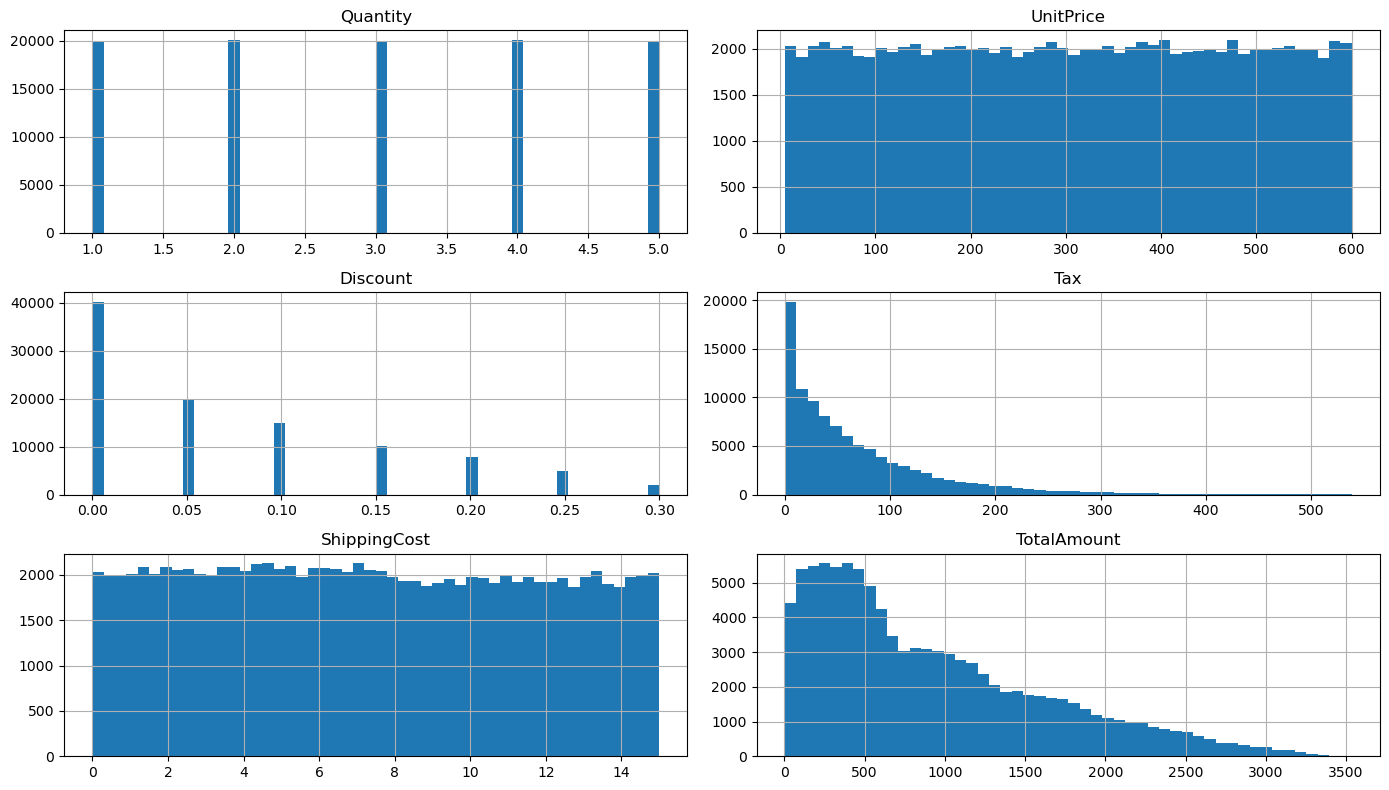

In [72]:
numerical_cols = [
    "Quantity",
    "UnitPrice",
    "Discount",
    "Tax",
    "ShippingCost",
    "TotalAmount"
]

df[numerical_cols].hist(
    figsize=(14, 8),
    bins=50
)

plt.tight_layout()
plt.show()


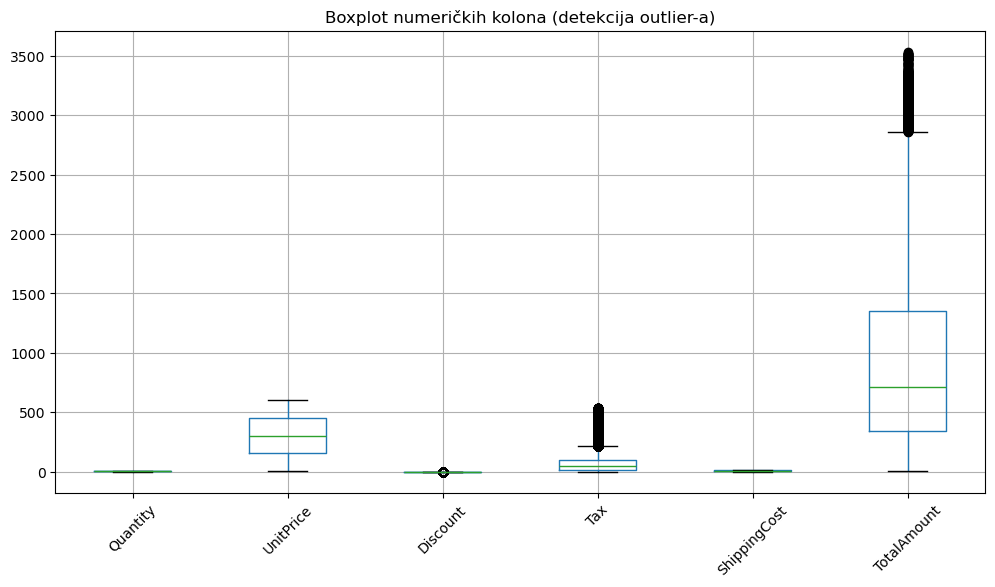

In [73]:
plt.figure(figsize=(12, 6))
df.boxplot(column=numerical_cols)
plt.xticks(rotation=45)
plt.title("Boxplot numeričkih kolona (detekcija outlier-a)")
plt.show()


In [22]:
print("OrderStatus distribucija:")
print(df["OrderStatus"].value_counts())

print("\nPaymentMethod distribucija:")
print(df["PaymentMethod"].value_counts())


OrderStatus distribucija:
OrderStatus
Delivered    74628
Shipped      15192
Pending       4103
Returned      3049
Cancelled     3028
Name: count, dtype: int64

PaymentMethod distribucija:
PaymentMethod
Credit Card         35038
Debit Card          20024
UPI                 15066
Amazon Pay          15017
Net Banking          9927
Cash on Delivery     4928
Name: count, dtype: int64


## Agregacija

In [81]:
customer_df = df.groupby("CustomerID").agg(
    broj_porudzbina=("OrderID", "count"),
    ukupna_potrosnja=("TotalAmount", "sum"),
    prosecna_vrednost_porudzbine=("TotalAmount", "mean"),
    prosecna_kolicina=("Quantity", "mean"),
    prosecni_popust=("Discount", "mean"),
    max_potrosnja_po_porudzbini=("TotalAmount", "max"),
    poslednja_kupovina=("OrderDate", "max")
).reset_index()

customer_df.head()


,CustomerID,broj_porudzbina,ukupna_potrosnja,prosecna_vrednost_porudzbine,prosecna_kolicina,prosecni_popust,max_potrosnja_po_porudzbini,poslednja_kupovina
0,CUST000001,1,446.48,446.48,1.00,0.10,446.48,2024-07-26
1,CUST000002,3,1389.93,463.31,3.00,0.08,689.40,2022-02-01
2,CUST000003,1,1116.91,1116.91,5.00,0.15,1116.91,2020-12-28
3,CUST000004,3,2660.06,886.69,2.33,0.18,1819.40,2024-06-17
4,CUST000005,1,1089.56,1089.56,4.00,0.20,1089.56,2023-03-31


In [82]:
reference_date = df["OrderDate"].max()

customer_df["recency_days"] = (
    reference_date - customer_df["poslednja_kupovina"]
).dt.days

customer_df.head()


,CustomerID,broj_porudzbina,ukupna_potrosnja,prosecna_vrednost_porudzbine,prosecna_kolicina,prosecni_popust,max_potrosnja_po_porudzbini,poslednja_kupovina,recency_days
0,CUST000001,1,446.48,446.48,1.00,0.10,446.48,2024-07-26,156
1,CUST000002,3,1389.93,463.31,3.00,0.08,689.40,2022-02-01,1062
2,CUST000003,1,1116.91,1116.91,5.00,0.15,1116.91,2020-12-28,1462
3,CUST000004,3,2660.06,886.69,2.33,0.18,1819.40,2024-06-17,195
4,CUST000005,1,1089.56,1089.56,4.00,0.20,1089.56,2023-03-31,639


In [83]:
customer_df.describe()


,broj_porudzbina,ukupna_potrosnja,prosecna_vrednost_porudzbine,prosecna_kolicina,prosecni_popust,max_potrosnja_po_porudzbini,poslednja_kupovina,recency_days
count,43233.00,43233.00,43233.00,43233.00,43233.00,43233.00,43233,43233.00
mean,2.31,2123.97,918.46,3.00,0.07,1320.39,2023-04-11 20:01:40.922906112,627.17
min,1.00,6.19,6.19,1.00,0.00,6.19,2020-01-01 00:00:00,0.00
25%,1.00,876.19,508.94,2.00,0.03,664.33,2022-05-21 00:00:00,224.00
50%,2.00,1805.41,837.09,3.00,0.06,1240.49,2023-07-30 00:00:00,518.00
75%,3.00,2992.43,1226.15,4.00,0.10,1883.41,2024-05-19 00:00:00,953.00
max,10.00,15215.79,3484.44,5.00,0.30,3534.98,2024-12-29 00:00:00,1824.00
std,1.26,1594.38,551.59,1.08,0.06,778.95,NaN,478.12


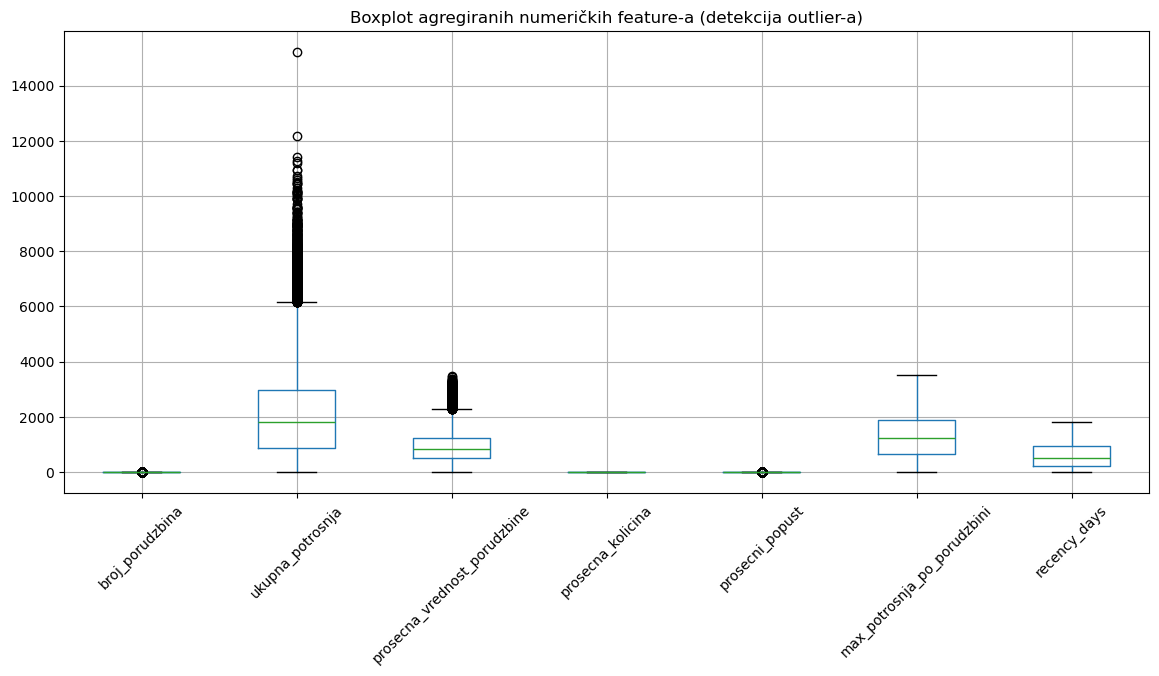

In [84]:
plt.figure(figsize=(14, 6))
customer_df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot agregiranih numeričkih feature-a (detekcija outlier-a)")
plt.show()


In [85]:
# Log transformacija zbog desne asimetrije
customer_df["ukupna_potrosnja_log"] = np.log1p(customer_df["ukupna_potrosnja"])
customer_df["prosecna_vrednost_log"] = np.log1p(customer_df["prosecna_vrednost_porudzbine"])


### Selekcija numerickih feature-a za klasterizaciju

In [87]:
features = [
    "broj_porudzbina",
    "ukupna_potrosnja_log",
    "prosecna_vrednost_log",
    "prosecna_kolicina",
    "prosecni_popust",
    "recency_days"
]

X = customer_df[features].copy()
X.head()


,broj_porudzbina,ukupna_potrosnja_log,prosecna_vrednost_log,prosecna_kolicina,prosecni_popust,recency_days
0,1,6.10,6.10,1.00,0.10,156
1,3,7.24,6.14,3.00,0.08,1062
2,1,7.02,7.02,5.00,0.15,1462
3,3,7.89,6.79,2.33,0.18,195
4,1,6.99,6.99,4.00,0.20,639


### Skaliranje podataka

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(
    X_scaled_array,
    columns=X.columns,          
    index=customer_df["CustomerID"]
)

X_scaled.head()

,broj_porudzbina,ukupna_potrosnja_log,prosecna_vrednost_log,prosecna_kolicina,prosecni_popust,recency_days
CustomerID,,,,,,
CUST000001,-1.04,-1.19,-0.66,-1.86,0.41,-0.99
CUST000002,0.55,-0.06,-0.61,-0.00,0.15,0.91
CUST000003,-1.04,-0.27,0.55,1.86,1.21,1.75
CUST000004,0.55,0.59,0.25,-0.62,1.74,-0.90
CUST000005,-1.04,-0.30,0.52,0.93,2.01,0.02


In [94]:
pd.DataFrame(X_scaled, columns=features).describe()


,broj_porudzbina,ukupna_potrosnja_log,prosecna_vrednost_log,prosecna_kolicina,prosecni_popust,recency_days
count,43233.00,43233.00,43233.00,43233.00,43233.00,43233.00
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.04,-5.30,-6.11,-1.86,-1.18,-1.31
25%,-1.04,-0.52,-0.48,-0.93,-0.79,-0.84
50%,-0.25,0.20,0.17,-0.00,-0.19,-0.23
75%,0.55,0.71,0.68,0.93,0.41,0.68
max,6.11,2.33,2.05,1.86,3.60,2.50


## K-Means

### Elbow metoda (inertia)

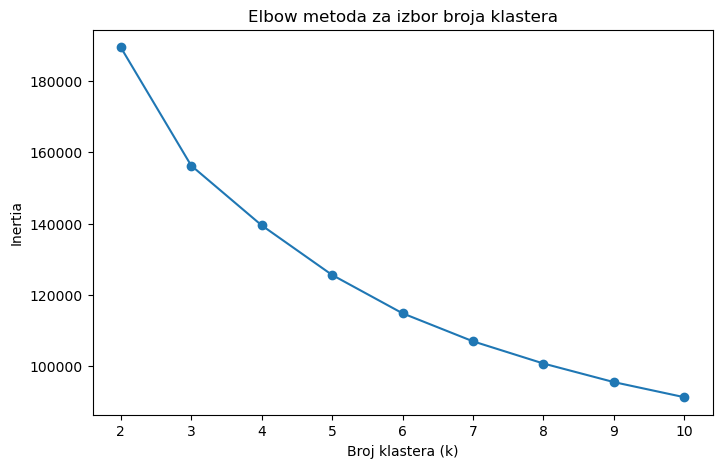

In [95]:
from sklearn.cluster import KMeans

inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=RANDOM_STATE,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker="o")
plt.xlabel("Broj klastera (k)")
plt.ylabel("Inertia")
plt.title("Elbow metoda za izbor broja klastera")
plt.show()


Elbow (lakat) je oko k = 5 ili k = 6. Dodavanje klastera nakon toga ne donosi znacajno poboljšanje kompaktnosti.

### Silhouette analiza

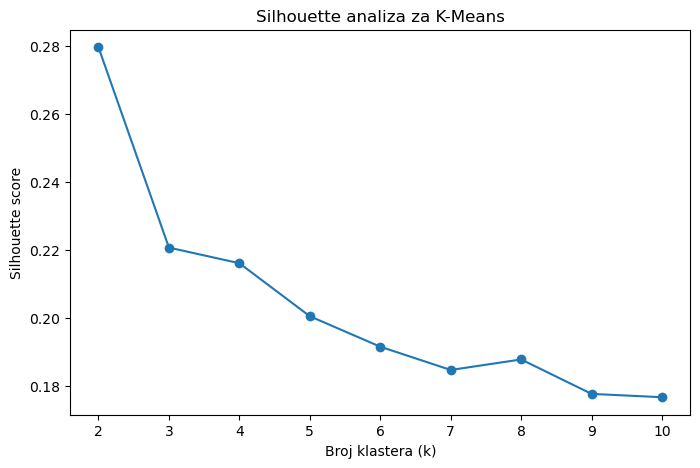

In [100]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=RANDOM_STATE,
        n_init=10
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel("Broj klastera (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette analiza za K-Means")
plt.show()


Uprkos najvecem Silhouette score-u za k = 2, izabrano je k = 5 kao interpretabilniji kompromis, u skladu sa Elbow metodom.

In [101]:
optimal_k = 5

kmeans = KMeans(
    n_clusters=optimal_k,
    random_state=RANDOM_STATE,
    n_init=10
)

customer_df["cluster_kmeans"] = kmeans.fit_predict(X_scaled)

customer_df[["CustomerID", "cluster_kmeans"]].head()


,CustomerID,cluster_kmeans
0,CUST000001,4
1,CUST000002,4
2,CUST000003,0
3,CUST000004,0
4,CUST000005,0


In [103]:
sil_score_kmeans = silhouette_score(X_scaled, customer_df["cluster_kmeans"])
print(f"Silhouette score (KMeans): {sil_score_kmeans:.3f}")

Silhouette score (KMeans): 0.200


In [104]:
customer_df["cluster_kmeans"].value_counts().sort_index()


cluster_kmeans
0     5834
1    12287
2     5267
3    10059
4     9786
Name: count, dtype: int64

In [105]:
cluster_summary = (
    customer_df
    .groupby("cluster_kmeans")[features]
    .mean()
)

cluster_summary


,broj_porudzbina,ukupna_potrosnja_log,prosecna_vrednost_log,prosecna_kolicina,prosecni_popust,recency_days
cluster_kmeans,,,,,,
0,1.68,7.13,6.69,3.34,0.17,761.63
1,3.82,8.19,6.89,3.17,0.07,327.82
2,1.21,5.38,5.24,1.88,0.07,986.05
3,1.59,7.57,7.18,3.92,0.04,894.41
4,2.14,7.02,6.33,2.24,0.05,455.00


- **Klaster 0:** Malo porudzbina, veca osetljivost na popuste, neaktivni.
- **Klaster 1:** Najaktivniji kupci sa najvecom potrosnjom.
- **Klaster 2:** Najniza potrosnja i dug period bez kupovine.
- **Klaster 3:** Visoka vrednost porudzbina, trenutno neaktivni.
- **Klaster 4:** Umereno aktivni kupci srednje potrosnje.

### PCA

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

print("Udeo objašnjene varijanse:", pca.explained_variance_ratio_)


Udeo objašnjene varijanse: [0.41476156 0.22719577]


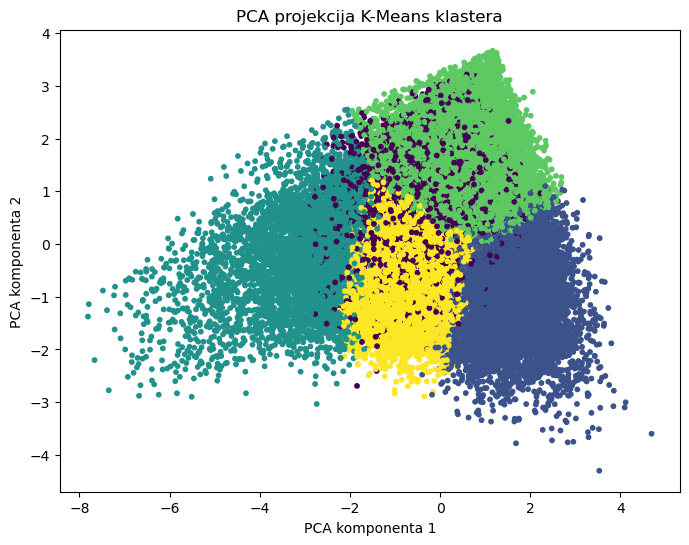

In [108]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=customer_df["cluster_kmeans"],
    s=10
)

plt.xlabel("PCA komponenta 1")
plt.ylabel("PCA komponenta 2")
plt.title("PCA projekcija K-Means klastera")
plt.show()


### PCA transformacija na 2 komponente

In [110]:
from sklearn.decomposition import PCA

# PCA na 2 dimenzije radi vizualizacije
pca = PCA(n_components=2, random_state=RANDOM_STATE)

X_pca = pca.fit_transform(X_scaled)

print("Objasnjena varijansa po komponentama:", pca.explained_variance_ratio_)
print("Ukupno objasnjena varijansa:", pca.explained_variance_ratio_.sum())


Objasnjena varijansa po komponentama: [0.41476156 0.22719577]
Ukupno objasnjena varijansa: 0.6419573295964932


### DBSCAN klasterizacija

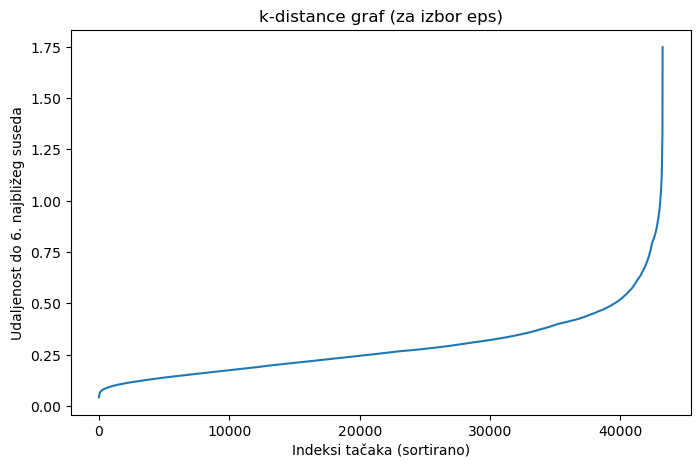

In [112]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# imamo 6 numerickih feature-a
k = 6

nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_scaled)

distances, _ = nbrs.kneighbors(X_scaled)

# Sortiranje udaljenosti do k-tog suseda
k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.xlabel("Indeksi tačaka (sortirano)")
plt.ylabel(f"Udaljenost do {k}. najbližeg suseda")
plt.title("k-distance graf (za izbor eps)")
plt.show()


Vidimo da je eps ≈ 0.5

In [119]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.5,
    min_samples=6
)

customer_df["cluster_dbscan"] = dbscan.fit_predict(X_scaled)


In [120]:
customer_df["cluster_dbscan"].value_counts().sort_index()


cluster_dbscan
-1     2005
 0      369
 1     8752
 2      249
 3      150
       ... 
 77       6
 78       6
 79       5
 80       6
 81       5
Name: count, Length: 83, dtype: int64

In [121]:
outlier_ratio = (customer_df["cluster_dbscan"] == -1).mean()
print(f"Procenat outlier-a: {outlier_ratio:.2%}")


Procenat outlier-a: 4.64%


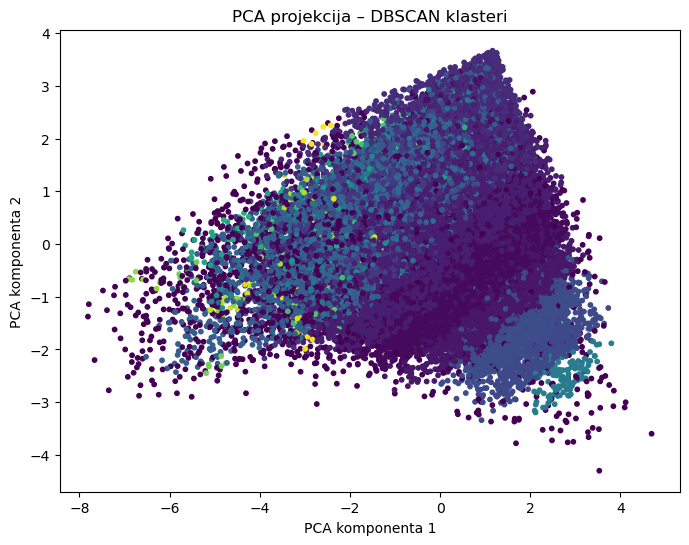

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=customer_df["cluster_dbscan"],
    s=10
)
plt.xlabel("PCA komponenta 1")
plt.ylabel("PCA komponenta 2")
plt.title("PCA projekcija – DBSCAN klasteri")
plt.show()


DBSCAN nije identifikovao jasne gustinske klastere, vec kontinualnu strukturu sa malim udelom suma (~5%).

In [124]:
mask = customer_df["cluster_dbscan"] != -1
mask = mask.values

sil_score_dbscan = silhouette_score(
    X_scaled[mask],
    customer_df.loc[mask, "cluster_dbscan"]
)

print(f"Silhouette score (DBSCAN): {sil_score_dbscan:.3f}")

Silhouette score (DBSCAN): -0.045


Silhouette < 0, tacke su u proseku blize tackama iz drugih klastera nego svom klasteru.

### Hierarchical (Ward)

In [127]:
sample_size = 3000
idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)

X_sample = X_scaled.iloc[idx]

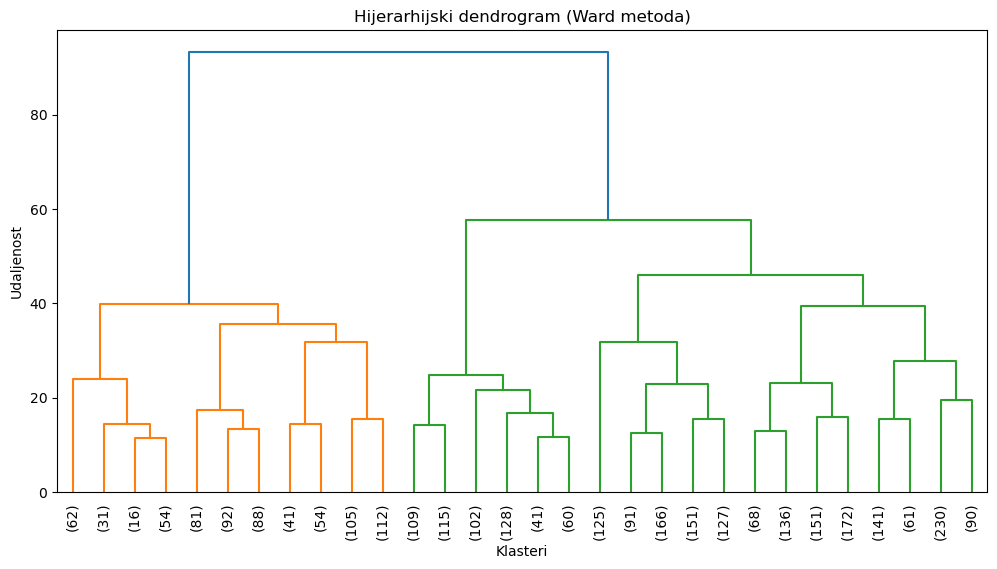

In [128]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X_sample, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90,
    leaf_font_size=10
)

plt.title("Hijerarhijski dendrogram (Ward metoda)")
plt.xlabel("Klasteri")
plt.ylabel("Udaljenost")
plt.show()


Dendrogram (Ward metoda) ukazuje na postojanje dve dominantne
grupe, sa daljim podstrukturama unutar njih. Ovo sugerise da
podaci nemaju jasno izrazenih pet prirodnih klastera, vec
kontinualnu hijerarhijsku strukturu.

In [129]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4

agg = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage="ward"
)

customer_df["cluster_hier"] = agg.fit_predict(X_scaled)


In [131]:
customer_df["cluster_hier"].value_counts().sort_index()


cluster_hier
0    20268
1     3412
2     7473
3    12080
Name: count, dtype: int64

In [140]:
n_clusters = 4

agg = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage="ward"
)

labels_sample = agg.fit_predict(X_sample)

sil_score_hier = silhouette_score(X_sample, labels_sample)

print(f"Silhouette score (Hijerarhijski, k={n_clusters}, sample): {sil_score_hier:.3f}")

Silhouette score (Hijerarhijski, k=4, sample): 0.124


In [142]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

k_range = range(2, 9)
sil_scores_hier = []


In [143]:
for k in k_range:
    agg = AgglomerativeClustering(
        n_clusters=k,
        linkage="ward"
    )
    
    labels = agg.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    sil_scores_hier.append(score)


In [144]:
for k, score in zip(k_range, sil_scores_hier):
    print(f"k={k}: Silhouette: {score:.3f}")


k=2: Silhouette: 0.273
k=3: Silhouette: 0.166
k=4: Silhouette: 0.124
k=5: Silhouette: 0.121
k=6: Silhouette: 0.114
k=7: Silhouette: 0.119
k=8: Silhouette: 0.117


Silhouette analiza za hijerarhijsku klasterizaciju je sprovedena na
istom uzorku kao i dendrogram, pri cemu je najveci skor dobijen za k=2.
Ipak, k=4 je izabran kao kompromis radi interpretabilnije segmentacije
na srednjem nivou hijerarhije.

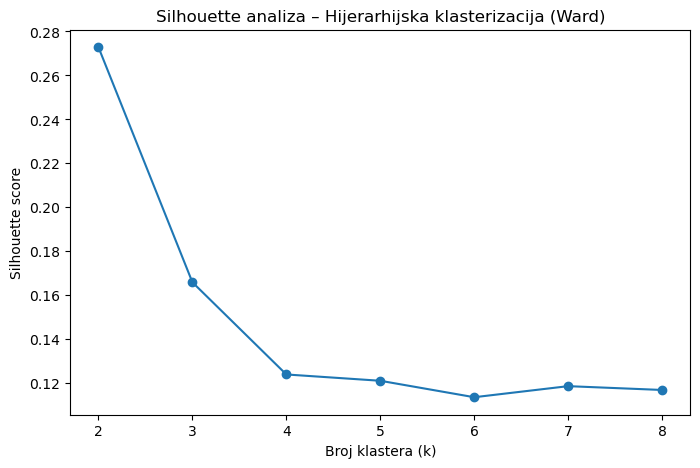

In [145]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores_hier, marker="o")
plt.xlabel("Broj klastera (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette analiza – Hijerarhijska klasterizacija (Ward)")
plt.show()


## Diskusija rezultata klasterizacije

In [147]:
results = {
    "Algorithm": [
        "K-Means",
        "DBSCAN",
        "Hierarchical (Ward)"
    ],
    "Silhouette score": [
        sil_score_kmeans,    
        sil_score_dbscan, 
        max(sil_scores_hier) 
    ],
    "Detected clusters": [
        optimal_k,     
        customer_df["cluster_dbscan"].nunique(),  
        k_range[sil_scores_hier.index(max(sil_scores_hier))]
    ],
    "Outlier handling": [
        "No",
        "Yes",
        "No"
    ]
}

In [148]:
results_df = pd.DataFrame(results)
results_df

,Algorithm,Silhouette score,Detected clusters,Outlier handling
0,K-Means,0.20,5,No
1,DBSCAN,-0.04,83,Yes
2,Hierarchical (Ward),0.27,2,No


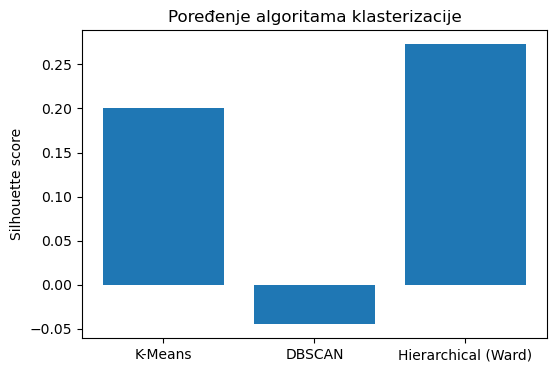

In [139]:
plt.figure(figsize=(6, 4))
plt.bar(
    results_df["Algorithm"],
    results_df["Silhouette score"]
)

plt.ylabel("Silhouette score")
plt.title("Poređenje algoritama klasterizacije")
plt.show()

Rezultati ukazuju da se ponasanje kupaca ne grupise u jasno razdvojene
prirodne klastere, vec formira kontinualnu strukturu koja se moze
segmentirati u zavisnosti od analitickih potreba.